In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load CSV
df_train = pd.read_csv("../Dataset/CSVs/TrainDataset.csv")
df_val = pd.read_csv("../Dataset/CSVs/ValidationDataset.csv")
df_test = pd.read_csv("../Dataset/CSVs/TestDataset.csv")
df_train["Set"] = "Entrenamiento"
df_val["Set"] = "Validación"
df_test["Set"] = "Prueba"

In [11]:
# Concatenate all dataframes
df = pd.concat([df_train, df_val, df_test])
# reset idx
df.reset_index(drop=True, inplace=True)
df

,SegmentedAudioPath,OriginalAudioPath,StartSecond,EndSecond,Class,Set
0,../Dataset/Audios/SegmentedAudios/Batida/chann...,../Dataset/Audios/Full/channelA_2024-05-28_01-...,14.0,14.0,Batida,Entrenamiento
1,../Dataset/Audios/SegmentedAudios/Batida/chann...,../Dataset/Audios/Full/channelA_2024-05-28_01-...,17.0,17.0,Batida,Entrenamiento
2,../Dataset/Audios/SegmentedAudios/Batida/chann...,../Dataset/Audios/Full/channelA_2024-05-28_01-...,46.0,46.0,Batida,Entrenamiento
3,../Dataset/Audios/SegmentedAudios/Batida/chann...,../Dataset/Audios/Full/channelA_2024-05-28_01-...,16.0,17.0,Batida,Entrenamiento
4,../Dataset/Audios/SegmentedAudios/Batida/chann...,../Dataset/Audios/Full/channelA_2024-05-28_01-...,19.0,19.0,Batida,Entrenamiento
...,...,...,...,...,...,...
1215,../Dataset/Audios/SegmentedAudios/Whistle/chan...,../Dataset/Audios/Full/channelA_2024-05-28_01-...,34.0,35.0,Whistle,Prueba
1216,../Dataset/Audios/SegmentedAudios/Whistle/chan...,../Dataset/Audios/Full/channelA_2024-05-28_01-...,37.0,40.0,Whistle,Prueba
1217,../Dataset/Audios/SegmentedAudios/Whistle/chan...,../Dataset/Audios/Full/channelA_2024-05-28_01-...,57.0,59.0,Whistle,Prueba
1218,../Dataset/Audios/SegmentedAudios/Whistle/chan...,../Dataset/Audios/Full/channelA_2024-05-28_01-...,45.0,45.0,Whistle,Prueba


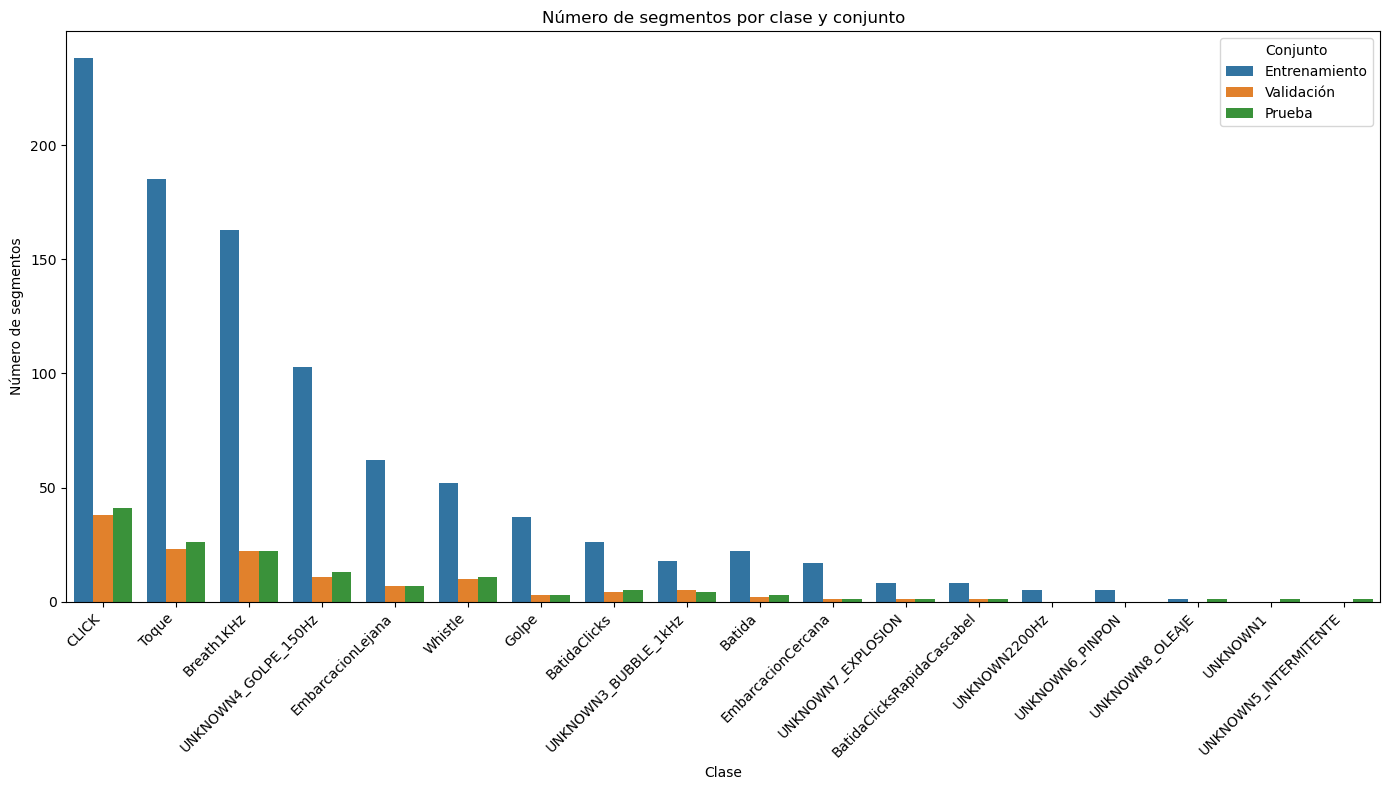

In [13]:
# Calculate counts
class_counts = df['Class'].value_counts().sort_values(ascending=False)

# Plot count per class, each subset is a bar for each class (train, val and test) with matplotlib
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Class', hue='Set', order=class_counts.index)
plt.title('Número de segmentos por clase y conjunto')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize and alignment
plt.legend(title='Conjunto')
plt.xlabel('Clase')
plt.ylabel('Número de segmentos')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()